<font size = '+5' color = 'Red'><b>PUBG Hacker Detection | PCA- KMeans</b></font>

![](https://www.cerillion.com/cerillioncom/media/cerillionMedia/BlogImages/PUBG-Mobile.png?ext=.png?width=350)

<font size = '+3' color = 'Blue'><b>Introduction</b></font>

* I have made 1st notebook for this dataset just look at it you will get better idea about the dataset.
* Here we will discuss and start directly with the PCA only.

### What is PCA?

* Full form of PCA is Principle Component Analysis.

### Why we use it?

* We use it for clustering it is better than KMeans with complex data but in future notebook we will see other techniques which will perform better than PCA.

* When we have too many features (like in image processing we have too many pixels and each pixel acts like a feature), then we must have to reduce the number of features so that processing becomes easy and even with less features it helps us to visualize better if we reduce the features to 2D or 3D.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import plotly.express as px

<font size = '+3' color = 'blue'><b>Data Preprocessing</b></font>

In [2]:
# Reading CSV file
data = pd.read_csv('../input/pubg-statisctic/PUBG.csv')
data.head()

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077


In [3]:
# We will use only solo player data one can use squad or duo its up to him/her. So removing unnecessary columns

data.dropna(inplace=True)

columns_to_be_removed = np.arange(52,152,1)

data.drop(data.columns[columns_to_be_removed],axis=1,inplace = True)   # Removing columns form 52 to 151

data.drop(data.columns[[0,1]], axis = 1, inplace = True)               # Removing player_name and tracker_id

data.drop(columns= ['solo_Revives'],inplace = True)                    # There is no teammate to revive that is why removing

data.drop(columns= ['solo_DBNOs'], inplace = True)                     # DBNOs = Knock Outs, in solo game no knock out so always = 0


# By using data.shape we can see that there is 48 features left for solo player, uncomment below code

#data.shape


## Normalization and Standardization :

* Now by typing data.head() we can see that all features are in different scale for ex; time survived in minutes or seconds, rounds played in numbers, distance travelled in meters etc

* For PCA all standardization must be done.

* To do this we will use StandardScalar.

* Remember Standardization and Normalization both are different but same in some what manner.

### Normalization:

* Normalization converts all data in range of 0 to 1 so that we can get rid of different scale.

* Suppose there are some data points, list= [A1,A2,A3, ... An]. 

* Normalized A1  =  (A1 - minimum value from list)/ (maximum value from list - minimum value from list)

* If you put maximum value from list in place of A1 then value will be 1 and if you put minimum value from list in place of A1 then value will be 0. 

* Now lets understand what Standardization is...

### Standardization: 

* Standardization converts the list in such a way that Mean value of the list is = 0 and Standard deviation of the list = 1.  

* (1) It brings mean of the list to the Origin and 
* (2) It squizes or expand the list to bring standard deviation = 1

* For the same list Standardized A1 = (A1- Mean of list) / (standard deviation of list)

<font size = '+2' color=  'Green'><b>Standardization</b></font>

In [4]:
# Its just one line of code...

standardized_data = StandardScaler().fit_transform(data)
standardized_data.shape

(87898, 48)

<font size = '+3' color = 'Blue'><b> Principle Component Analysis (PCA) </b></font>

* Now we have our standardized data its time to do PCA.

* It just means we want to reduce the numbers of features from 48 to some value for ex; 15 or 20 or 3
* Reduction of features means loss of information right?? but we want to reduce the features in such a way that almost 95% of information can be explained by remaining features (which are left after reduction). 

### How to do this??

* PCA gives explained_variance_ feature which tells us that how much information is associated with particular feature.

* First we will fit all the features to the PCA then we will plot cumulative explained_varience_ vs numbers of features plot, which will tell us that which feature is containing how much information.

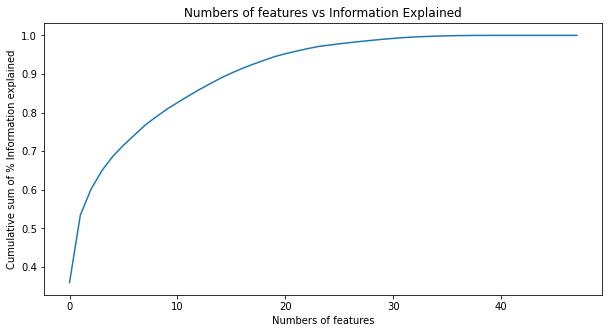

In [5]:
pca = decomposition.PCA()                         # Just simple varible assignment

pca.n_components = 48                             # Total numbers of features

pca_data = pca.fit_transform(standardized_data)   # Fitting all the features to the PCA

info_explained_by_each_feature = pca.explained_variance_ / np.sum(pca.explained_variance_)      # Calculating information explained by each feature

cum_info_explained = np.cumsum(info_explained_by_each_feature)    # Cumulative sum of information explained by each feature


# Plotting Graph

plt.figure(figsize = (10,5))
plt.plot(cum_info_explained)
plt.title('Numbers of features vs Information Explained')
plt.xlabel('Numbers of features')
plt.ylabel('Cumulative sum of % Information explained');

* From the plot we can see that at Numbers of features ~ 20 the information explained is approx ~ 95%, so we can take only 20 features and it will give almost same result.

* After doiing this, it is easy to do KMeans Clustering because of less numbers of features.

* Below code is for removing least informative features (the last 20 features).

### One question is how will we know that particular feature is least informative and particular feature is more informative?

* PCA is designed intelligently that it will give us the most informative features by just typing how many features we want.

In [6]:
pca = decomposition.PCA()

pca.n_components = 20                              # we want 20 most informative features.

pca_data = pca.fit_transform(standardized_data)    # It will calculate and provide features as an array

df = pd.DataFrame(pca_data)                       # Converting array in to dataframe

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.309960,3.165875,1.103092,-0.167975,-0.244133,0.194474,-0.582177,0.899946,-1.307233,0.171282,-1.473613,1.164481,-0.057000,0.353353,1.385957,-0.586719,0.804517,0.179139,0.014064,-0.399337
1,-0.026820,5.671436,1.142075,0.043200,0.221270,2.727271,1.159297,-0.428253,-1.411335,-0.001349,-0.884916,-0.377822,0.708831,0.856212,0.064681,-0.666551,0.828670,-0.507276,-0.930612,0.075059
2,-3.866611,0.462650,0.816893,2.012226,-0.360656,0.999274,0.080938,-0.515855,0.311909,-0.241224,-0.458541,-1.211255,-0.013189,0.786325,-0.195799,-1.127893,0.622247,-0.939574,-0.696658,-1.197802
3,-3.177694,11.504710,1.058533,1.461265,0.178846,-1.349653,-0.783049,2.895178,0.948051,0.113860,-1.438363,-3.426899,-0.073650,0.693401,-0.460993,-1.953531,0.080265,-0.255416,-0.035937,0.067417
4,-3.677279,11.153186,0.592226,1.650905,0.313959,-0.570893,-0.130341,-0.430038,1.189058,-0.034655,-0.785726,-2.512207,0.656356,0.448749,-0.720118,-1.436472,-0.300147,-0.297274,-0.096434,0.003104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87893,-1.094492,-2.409093,0.378009,-0.026695,0.823771,-0.598840,0.119514,-1.029215,0.331726,-0.288202,0.323428,1.232494,0.282854,-0.072529,-0.108006,-0.146880,0.642280,0.055380,-0.236338,-0.415328
87894,-1.057222,0.159590,0.567186,-1.373950,-0.445429,-0.780032,0.295115,-0.339268,-0.363565,-0.591795,-0.014337,-0.768512,-0.322283,-0.282899,0.525576,1.112206,-0.162818,0.529683,0.125293,-0.064777
87895,-3.412016,-2.607738,-0.320389,0.993553,-0.505528,0.459134,0.540431,-0.150992,0.190163,0.195662,0.230275,0.162151,-0.421127,0.010512,0.889752,0.254393,0.151629,-0.122645,0.027587,-0.253110
87896,2.069908,5.645394,2.204580,0.672315,2.146967,1.362003,-0.898463,0.086098,-1.248468,-0.325926,-0.618450,-1.639888,-0.205849,0.658098,-0.810990,0.111746,1.271376,1.320126,-0.516470,-0.458536


<font size = '+3' color = 'blue'><b>KMeans</b></font>

<font size = '+2' color = 'green'><b>(1) Splitting the Data </b></font>

In [7]:
train, test = train_test_split(df,test_size = 0.2,random_state = 1)
dev , test = train_test_split(test,test_size = 0.2,random_state = 1)

<font size = '+2' color = 'green'><b>(2) Training KMeans </b></font>

In [8]:
ks = range(1,10)
inertias = []

for i in ks:
    model = KMeans(n_clusters = i,init = 'k-means++',random_state=1 )
    model.fit(train)
    
    inertias.append(model.inertia_)
    
    print(f'Inertia for {i} Culsters is {model.inertia_:.0f}')
    
for i in range(1,9):
    print(f'The difference between inertia of {i+1} and {i} cluster is {inertias[i-1] - inertias[i]}')

Inertia for 1 Culsters is 3071305
Inertia for 2 Culsters is 2414534
Inertia for 3 Culsters is 2124342
Inertia for 4 Culsters is 1883352
Inertia for 5 Culsters is 1755031
Inertia for 6 Culsters is 1651891
Inertia for 7 Culsters is 1564409
Inertia for 8 Culsters is 1507906
Inertia for 9 Culsters is 1458633
The difference between inertia of 2 and 1 cluster is 656771.2928398219
The difference between inertia of 3 and 2 cluster is 290192.46030054614
The difference between inertia of 4 and 3 cluster is 240989.33941572346
The difference between inertia of 5 and 4 cluster is 128321.35807164363
The difference between inertia of 6 and 5 cluster is 103139.95322803268
The difference between inertia of 7 and 6 cluster is 87481.98811289901
The difference between inertia of 8 and 7 cluster is 56502.922382109566
The difference between inertia of 9 and 8 cluster is 49273.430609164294


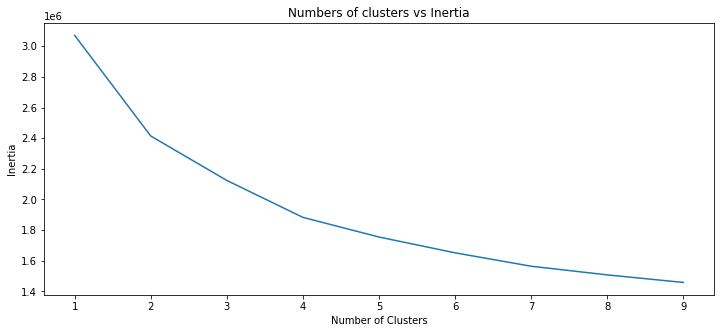

In [9]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Numbers of clusters vs Inertia')
plt.plot(ks,inertias);

# We can see that after number of cluster = 4 the inertia reduces very slowly so that optimal number of clusters is 4 

In [10]:
kmeans = KMeans(n_clusters=4, init = 'k-means++',random_state=1).fit(train)

labels = kmeans.labels_

df_trained = pd.DataFrame(train)
df_trained['Cluster'] = pd.Series(labels)

cluster_names = {0:'Beginner',1:'Hacker',2:'Experienced',3:'Professional'}
df_trained['Cluster_names'] = df_trained['Cluster'].map(cluster_names)
df_trained.dropna(inplace = True)

## (1) I know this will not be better visualization but believe me this is the process of PCA and that is how PCA assist to reduce the number of features.

## (2) We should have done it with 6 features to get better visualization (I have done it in different notebook ) 

link: https://www.kaggle.com/krunalkumardegamdiya/pubg-hacker-detection-with-kmeans

## (3) And also I know there may be almost similar features like WinRatio and Top10Ratio etc but at the the end our motive was to use PCA - Reduce the feature - and then use KMeans ( we have achieved it).

## (4) We will use better technique to specifically visualize the data (spoiler alert : t-SNE method)

In [11]:
# Note that the clustering is based on the 20 features means 20 Dimensions which we can not visualize so this 3d scatter plot is not looking good.

scatter = px.scatter_3d(x=0,y=1,z=2,data_frame=df_trained,color='Cluster_names')
scatter.show()